# Data wrangling


El **data wrangling**, a veces denominada **data munging**, es el proceso de transformar y mapear datos de un dataset raw (en bruto) en otro formato con la intención de hacerlo más apropiado y valioso para una variedad de propósitos posteriores, como el análisis. Un **data wrangler** es una persona que realiza estas operaciones de transformación.

Esto puede incluir munging, visualización de datos, agregación de datos, entrenamiento de un modelo estadístico, así como muchos otros usos potenciales. La oscilación de datos como proceso generalmente sigue un conjunto de pasos generales que comienzan extrayendo los datos en forma cruda del origen de datos, dividiendo los datos en bruto usando algoritmos (por ejemplo, clasificación) o analizando los datos en estructuras de datos predefinidas, y finalmente depositando el contenido resultante en un sistema de almacenamiento (o silo) para su uso futuro.

## Contenido

<ul class="nav nav-pills">
  <li class="nav-item">
    <a class="nav-link active" href="#sets">Subconjuntos</a>
  </li>
  <li class="nav-item">
    <a class="nav-link active" href="#missing">Missing values</a>
  </li>
  <li class="nav-item">
    <a class="nav-link active" href="#categorical">Categorical data</a>
  </li>
  <li class="nav-item">
    <a class="nav-link active" href="#split">Splitting data</a>
  </li>
  <li class="nav-item">
    <a class="nav-link active" href="#scaling">Feature scaling</a>
  </li>
  <li class="nav-item">
    <a class="nav-link active" href="#Dummy">Dummy Dataset</a>
  </li>
  <li class="nav-item">
    <a class="nav-link active" href="#groupby">Agrupación de datos</a>
  </li>
  <li class="nav-item">
    <a class="nav-link active" href="#mapreduce">Map, Filter & Transform</a>
  </li>
  <li class="nav-item">
    <a class="nav-link active" href="#joinme">Agrupacion de datos II</a>
  </li>
</ul>


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# special functions

In [2]:
# DataFrame
df = pd.read_csv("../data/customer-churn-model/Customer_Churn_Model.csv", header = 0)
df.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


<a id="sets"></a>
## Subset

### Selección de las columnas o variables deseadas

Una forma de reducir información redundante es seleccionar las columas y/o variables en las que estamos interesados, y almacenarlas, o bien en un nuevo **dataframe**, o bien en un array u otra estructura de datos.

In [3]:
# selección de variables y guardado en un nuevo dataframe
subset = df[["Account Length", "Phone", "Eve Charge", "Day Calls"]]
subset.head(3)

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114


In [4]:
# selección de variables y guardado en un array
X = df[["Account Length", "Phone", "Eve Charge", "Day Calls"]].values

print("Tipo de estructura: ", type(X))
print("forma de la estructura: ", X.shape)

Tipo de estructura:  <class 'numpy.ndarray'>
forma de la estructura:  (3333, 4)


### Eliminación de las columnas o variables no útiles

Si por el contrario, las columnas anteriores son variables que queremos eliminar de nuestro conjunto de datos, podemos hacer lo siguiente:

In [5]:
# Listamos las columnas no deseadas
not_desired_columns = ["Account Length", "Phone", "Eve Charge", "Day Calls"]

# Listamos todas las columnas
all_columns = df.columns.values.tolist()

"""
Ahora podemos elegir entre los dos conjuntos de listas. Para ello vamos a usar una list comprenhension.
"""

# seleccionamos las columnas deseadas
subset = [ columna for columna in all_columns if columna not in not_desired_columns ]

# Creamos un dataframe con las columnas seleccionadas
df_2 = df[subset]

# visualizamos
df_2.head(3)

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Charge,Eve Mins,Eve Calls,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,no,yes,25,265.1,45.07,197.4,99,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,27.47,195.5,103,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,41.38,121.2,110,162.6,104,7.32,12.2,5,3.29,0,False.


### Selección por fila

Puede que nos convenga seleccionar un tipo específico de usuario. Este tipo de usuario o variable puede tener que cumplir unas ciertas condiciones. Para ello podemos usar los siguientes comandos.

In [6]:
##Usuarios con Day Mins > 300
df_1 = df[df["Day Mins"]>300]
print("Usuarios con Day Mins > 300", df_1.shape)

##Usuarios de Nueva York (State = "NY")
df_2 = df[df["State"]=="NY"]
print("Usuarios de Nueva York (State = 'NY')", df_2.shape)

##AND -> &
df_3 = df[(df["Day Mins"]>300) & (df["State"]=="NY")]
print("Usuarios con Day Mins > 300 y del estado de NY",df_3.shape)

##OR -> |
df_4 = df[(df["Day Mins"]>300) | (df["State"]=="NY")]
print("Usuarios con Day Mins > 300 o del estado de NY",df_4.shape)

Usuarios con Day Mins > 300 (43, 21)
Usuarios de Nueva York (State = 'NY') (83, 21)
Usuarios con Day Mins > 300 y del estado de NY (2, 21)
Usuarios con Day Mins > 300 o del estado de NY (124, 21)


<a id="missing"></a>
## Missing values

<a id="categorical"></a>
## Categorical data

<a id="split"></a>
## Splitting data 

Para poder validar nuestros modelos tendríamos que tener información adicional que nos permitiese confirmar nuestras predicciones. Otra forma es utilizar la información que ya tenemos, y dividir el conjunto de datos en dos subconjuntos. Uno será el conjunto de datos **train**, y otro será el conjunto de datos **test**. El primero nos servirá para generar o construir nuestro modelo, mientras que el segundo lo utilizaremos para validaciones.

Vamos a usar una función precedente de la biblioteca *sklearn*, y dividiremos el conjunto de datos en un **80%** para el conjunto de entrenamiento (**train**) y un **20%** para el conjunto test.
Para comprobar resultados, establecemos una semilla (random_state = 0)

In [7]:
# import libraries
from sklearn.model_selection import train_test_split

# define variables
X = df[['Day Calls', 'Day Mins']].values
y = df['Day Charge']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# the data
print(len(y_train) + len(y_test) == len(y))

True


<a id="scaling"></a>
## Feature scaling

Puede ser que tengamos dos variables numéricas pero estas tengan escalas distintas. Por ejemplo, que nuestras variables sean la edad y el salario. Mientras que la edad será siempre menor que 100, los salarios serán mucho mayor que este número, por lo que podemos afirmar que se encuentran es escalas distintas.

Esto hará que las variables que tienen una escala mayor, dominen sobre las que tienen una escala menor, y nuestros modelos queden distorsionados por estas variables.

Tenemos dos opciones:

* Standardisation
* Normalisation

### Estandarización (standardisation)

$$
x_{stand} = \frac{x - mean(x)}{std(x)}
$$

### Normalización (normalisation)

$$
x_{norm} = \frac{x - min(x)}{max(x) - min(x)}
$$

In [ ]:
# Biblioteca
from sklearn.preprocessing import StandardScaler

# Instanciamos la clase
sc_X = StandardScaler()

# usamos el método fit para el conjunto de entrenamiento
X_train = sc_X.fit_transform(X_train)

# método fir para el conjunto test
X_test = sc_X.transform(X_test)

# Instanciamos para la variable y la misma clase
sc_y = StandardScaler()

# transformamos la variable de entrenamiento
y_train = sc_y.fit_transform(y_train)

<a id="dummydata"></a>
## Dummy datasets

Vamos a ser un estudio sobre un conjunto de datos categóricos. Para ello nos resultaría muy útil poder agrupar los datos según las categorías que tenemos.

Pero primero vamos a generar un *dummy dataset* aprovechando los conocimientos en distribuciones de probabilidad aleatoria.

In [8]:
# características del conjunto de datos
n = 500

# variables categóricas (cualitativas)
gender = ["Male", "Female"]
income_status = ["Poor", "Middle", "Rich"]

# variables numéricas (cuantitativas)
# Z -> N(0,1)
# N(n,m) -> mu + sigma * z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 24000 + 3500 * np.random.randn(n)

# conjuntos de datos
#gender_data = np.empty(n, dtype=str)
#income_data = np.empty(n, dtype=str)
gender_data = []
income_data = []

# creamos los datos categóricos
for idx in range(n):
    
    # datos relativos al género
    #gender_data[idx] = np.random.choice(gender)
    gender_data.append(np.random.choice(gender))
    
    # datos relativos a los ingresos
    if income[idx] <= 20000:
        #income_data[idx] = income[0]
        income_data.append(income_status[0])
    elif income[idx] >= 30000:
        #income_data[idx] = income[2]
        income_data.append(income_status[2])
    else:
        #income_data[idx] = income[1]
        income_data.append(income_status[1])

In [9]:
# Creamos el DataFrame
df2 = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic_Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income    
    })

df2.head(3)

,Gender,Economic_Status,Height,Weight,Age,Income
0,Male,Middle,188.650818,58.069609,22.049281,24311.501392
1,Male,Middle,140.666184,67.161561,30.324294,25008.538486
2,Female,Rich,136.266564,46.630909,19.121139,30458.941837


<a id="groupby"></a>
## Agrupación de datos (group by)

<div class="alert alert-primary" role="alert">
  Este método nos crea un objeto sobre el cual podemos aplicarle otros métodos, funciones y atributos
</div>

### Funciones útiles que podemos aplicar

* Método .sum()
* .mean()
* .size(), nos devuelve el tamaño o el número de coincidencias
* .decribe(), obtenemos los estadísticos básicos

### Atributos


* groups: nos devuelve el nombre de los grupos sobre el que hemos agrupado y una serie de indices que corresponden al númnero de fila en el que se encontraban.

In [10]:
# agrupamos
group_gender = df2.groupby("Gender")

In [11]:
# ATRIBUTOS

# grupos de la agrupación
group_gender.groups

{'Female': Int64Index([  2,   3,   4,   8,  13,  14,  17,  18,  19,  21,
             ...
             484, 487, 490, 491, 492, 493, 494, 495, 496, 497],
            dtype='int64', length=253),
 'Male': Int64Index([  0,   1,   5,   6,   7,   9,  10,  11,  12,  15,
             ...
             473, 474, 478, 480, 485, 486, 488, 489, 498, 499],
            dtype='int64', length=247)}

Información de todos los grupos. Cada grupo es una nueva tabla.

In [12]:
for names, groups in group_gender:
    print(names)
    print(groups)

Female
     Gender Economic_Status      Height      Weight        Age        Income
2    Female            Rich  136.266564   46.630909  19.121139  30458.941837
3    Female            Poor  156.885247   78.228675  24.400662  19376.645156
4    Female            Rich  159.811239   57.992241  32.471018  32008.507971
8    Female          Middle  108.254140   46.266643  43.133666  21324.655940
13   Female          Middle  108.056964   58.040781  40.286148  21280.431322
14   Female          Middle  143.997330   38.671411  31.347260  21940.559778
17   Female            Poor  174.349599   66.110977  37.560601  17071.748190
18   Female            Poor  195.468963   95.785748  45.024162  15615.928957
19   Female          Middle  123.983735   83.410348  26.647997  21563.275855
21   Female          Middle  167.781039   80.950604  25.630719  20399.004943
22   Female          Middle  198.414782   86.375610  33.956443  24722.276061
24   Female          Middle  123.342707   84.437445  27.883181  23015

Si solo queremos una de las categorías de los grupos:

In [13]:
# todas las tablas donde el género es mujer "F"
group_gender.get_group("Female").head(3)

,Gender,Economic_Status,Height,Weight,Age,Income
2,Female,Rich,136.266564,46.630909,19.121139,30458.941837
3,Female,Poor,156.885247,78.228675,24.400662,19376.645156
4,Female,Rich,159.811239,57.992241,32.471018,32008.507971


Nos puede interesar realizar una agrupación para dos categorías

In [14]:
# creamos una agrupación
double_group = df2.groupby(["Gender", "Economic_Status"])

# número de grupos
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle')
     Gender Economic_Status      Height      Weight        Age        Income
8    Female          Middle  108.254140   46.266643  43.133666  21324.655940
13   Female          Middle  108.056964   58.040781  40.286148  21280.431322
14   Female          Middle  143.997330   38.671411  31.347260  21940.559778
19   Female          Middle  123.983735   83.410348  26.647997  21563.275855
21   Female          Middle  167.781039   80.950604  25.630719  20399.004943
22   Female          Middle  198.414782   86.375610  33.956443  24722.276061
24   Female          Middle  123.342707   84.437445  27.883181  23015.480733
26   Female          Middle  187.453942   16.217372  31.710487  24417.279307
28   Female          Middle  155.643000   84.504041  33.736480  20277.724803
29   Female          Middle  142.623407   55.638500  26.452818  22713.665686
30   Female          Middle  119.397563  100.176866  18.010018  29685.094604
35   Female          Middle  197.419607   83.478885  20

In [16]:
# Uso del método sum
double_group.sum()

Height        Weight          Age        Income
Gender Economic_Status                                                       
Female Middle           31281.421479  12478.002342  6083.650713  4.881766e+06
       Poor              6884.471564   2955.704599  1324.269542  7.732673e+05
       Rich              1774.331650    652.699979   319.878911  3.409119e+05
Male   Middle           33488.701715  13488.330844  6401.917478  5.128095e+06
       Poor              5681.994185   2288.830073   980.486629  6.012865e+05
       Rich               961.570061    433.620605   172.452807  1.896256e+05

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic_Status                                                
Female Middle           156.407107  62.390012  30.418254  24408.828446
       Poor             163.915990  70.373919  31.530227  18411.125567
       Rich             161.302877  59.336362  29.079901  30991.987496
Male   Middle           161.003374  64.847744  30.778449  24654.305265
       Poor             172.181642  69.358487  29.711716  18220.801598
       Rich             160.261677  72.270101  28.742135  31604.260509

In [18]:
double_group.size()

Gender  Economic_Status
Female  Middle             200
        Poor                42
        Rich                11
Male    Middle             208
        Poor                33
        Rich                 6
dtype: int64

In [19]:
# separamos la variable de interés
grouped_income = double_group["Income"]

# estadísticos básicos
grouped_income.describe()

count          mean          std           min  \
Gender Economic_Status                                                   
Female Middle           200.0  24408.828446  2473.891919  20050.717115   
       Poor              42.0  18411.125567  1751.214028  10663.661759   
       Rich              11.0  30991.987496   999.248271  30042.568229   
Male   Middle           208.0  24654.305265  2530.576980  20038.690015   
       Poor              33.0  18220.801598  1711.938896  12035.548578   
       Rich               6.0  31604.260509  1403.547853  30174.512787   

                                 25%           50%           75%           max  
Gender Economic_Status                                                          
Female Middle           22563.593621  24363.460267  26041.823154  29983.297757  
       Poor             17651.364007  19052.449537  19627.631463  19981.634188  
       Rich             30387.285016  30569.765711  31450.745561  33238.225817  
Male   Middle           22768.299216  24443.872371  26589.302952  29838.914767  
       Poor             17939.694497  18518.832531  19378.581102  19911.073868  
       Rich             30892.078049  31197.204410  31859.326839  34186.237871

In [20]:
double_group.aggregate(
{
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Economic_Status                                    
Female Middle           4.881766e+06  30.418254  29.302053
       Poor             7.732673e+05  31.530227  31.911777
       Rich             3.409119e+05  29.079901  34.277503
Male   Middle           5.128095e+06  30.778449  29.685076
       Poor             6.012865e+05  29.711716  27.560357
       Rich             1.896256e+05  28.742135  21.803851

In [21]:
double_group.aggregate(
{
    "Age": np.mean,
    "Height": lambda h: np.mean(h)/np.std(h)
})

Age    Height
Gender Economic_Status                     
Female Middle           30.418254  5.351147
       Poor             31.530227  5.198799
       Rich             29.079901  4.935479
Male   Middle           30.778449  5.436799
       Poor             29.711716  6.344304
       Rich             28.742135  8.051691

In [22]:
grouped_income.aggregate([np.sum, np.mean, np.std])

sum          mean          std
Gender Economic_Status                                         
Female Middle           4.881766e+06  24408.828446  2473.891919
       Poor             7.732673e+05  18411.125567  1751.214028
       Rich             3.409119e+05  30991.987496   999.248271
Male   Middle           5.128095e+06  24654.305265  2530.576980
       Poor             6.012865e+05  18220.801598  1711.938896
       Rich             1.896256e+05  31604.260509  1403.547853

In [23]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic_Status                                         
Female Middle           5.351147  2.464880  2.693200   9.891330
       Poor             5.198799  2.647187  2.587128  10.640789
       Rich             4.935479  4.206394  5.053961  32.529124
Male   Middle           5.436799  2.511020  2.530381   9.766067
       Poor             6.344304  3.675819  2.239017  10.808395
       Rich             8.051691  7.446719  2.046124  24.666585

<a id="mapreduce"></a>
## Filtrado de los grupos

Nos queremos quedar con los grupos cuyas edades sean un cierto valor. Para ello usamos la función `filter`.
Como el nombre sugiere, `filter` crea una lista de elementos para los cuales una función devuelve `True`.

In [24]:
double_group['Age'].filter(lambda age: age.sum() > 2400)

0      22.049281
1      30.324294
6      43.749624
7      39.680568
8      43.133666
9      17.050839
10     20.502656
11     22.624157
12     18.945218
13     40.286148
14     31.347260
15     26.418208
16     17.557434
19     26.647997
20     35.875128
21     25.630719
22     33.956443
23     49.340392
24     27.883181
25     33.732464
26     31.710487
27     18.853278
28     33.736480
29     26.452818
30     18.010018
31     56.454947
32     33.730135
33     28.465339
34     36.040712
35     20.559718
         ...    
464    32.505178
465    18.904547
466    37.127831
467    47.454518
468    31.695467
469    28.780426
470    26.468785
471    33.017050
472    23.580257
473    38.279921
474    39.602512
476    24.468978
478    27.120069
480    41.836809
483    40.630021
484    -2.821174
485    29.678389
486    26.542697
487    35.002672
488    26.745596
489    28.668167
490    31.218669
491    42.826518
492    30.110822
493     9.596038
494    45.368075
495    19.206573
496    25.7969

Obtenemos los elementos que pertenencen a un grupo cuya suma es mayor a 2400. Como vemos, esta función nos devuelve los elementos.

Podemos usar también el método `transform` para hacer una transformación matemática a los elementos de una columna. 
Supongamos que queremos calcular Z-score o la desviación estándar.

Si aplicamos la transformación Z-score obtendremos un conjunto de datos normalizados.

In [25]:
# Definición de zscore
zscore = lambda x: (x - np.mean(x))/np.std(x)

# aplicamos nuestra transformación
double_group.transform(zscore).head()

,Height,Weight,Age,Income
0,0.933605,-0.262461,-0.717649,-0.135792
1,-0.686751,0.089595,-0.037337,0.140319
2,-0.766051,-0.900698,-1.730790,-0.559484
3,-0.222989,0.295465,-0.584997,0.558026
4,-0.045641,-0.095286,0.589361,1.066938


Si ahora realizamos un gráfico de los datos obtendríamos una campana de gauss.

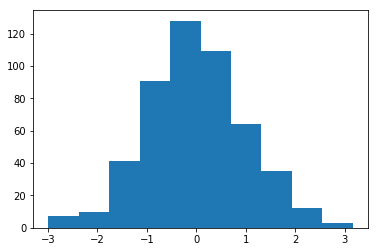

In [26]:
z_group = double_group.transform(zscore)

plt.hist(z_group['Age'])
plt.show()

## Operaciones diversas

Si queremos seleccionar algunas filas de nuestras tablas agrupadas, por ejemplo las primeras filas de cada uno de los grupos o las últimas filas

In [ ]:
double_group.head(1)

In [ ]:
double_group.tail(1)

In [ ]:
# Seleccionamos la fila 5th de cada grupo
double_group.nth(5)

## Concatenación de datos

Vamos a analizar las distintas opciones que tenemos para unir datos de distintas formas.

In [27]:
red_wine = pd.read_csv('../data/wine/winequality-red.csv', sep=';', header=0, index_col=0)
red_wine.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
white_wine = pd.read_csv('../data/wine/winequality-white.csv', sep=';', header=0, index_col=0)
white_wine.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Repaso:

* axis = 0 eje horizontal
* axis = 1 eje vertical

In [29]:
# Apilación de los datos
wine_data = pd.concat([red_wine, white_wine], axis = 0)
wine_data.shape

(6497, 11)

In [30]:
# Comprobación del número de filas
red_wine.shape[0] + white_wine.shape[0] == wine_data.shape[0]

True

## Agrupación de datos II

### Joins de datasets

Es propio de las bases de datos relacionales, donde la información puede estar almacenada en varias tablas. Estas tablas pueden ser de nuestro interés para realizar estudios.

* **left** join
* **right** join
* **inner** join